In [1]:
import wntr
import pandas as pd
from datetime import date

In [2]:
from sklearn.cluster import KMeans
import folium

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_excel("1_Data/Materiais/Coordenada.xlsx")
df

,Nó,Long,lat
0,J10,-47.652522,-15.678607
1,J100,-47.658211,-15.680257
2,J1000,-47.647968,-15.671222
3,J1002,-47.648220,-15.672854
4,J1004,-47.646978,-15.673864
...,...,...,...
518,J998,-47.651128,-15.672340
519,V8002_NU,-47.653317,-15.676426
520,V8002_ND,-47.653226,-15.676390
521,RAP.VAM.001.LIT.001.000,-47.654630,-15.679310


In [4]:
x = df[["lat", "Long"]]
x.head()

,lat,Long
0,-15.678607,-47.652522
1,-15.680257,-47.658211
2,-15.671222,-47.647968
3,-15.672854,-47.648220
4,-15.673864,-47.646978


In [5]:
model = KMeans(n_clusters=5)
y_kmeans = model.fit_predict(x)

In [6]:
df['y'] = y_kmeans

In [7]:
df.head()

,Nó,Long,lat,y
0,J10,-47.652522,-15.678607,0
1,J100,-47.658211,-15.680257,1
2,J1000,-47.647968,-15.671222,2
3,J1002,-47.648220,-15.672854,2
4,J1004,-47.646978,-15.673864,2


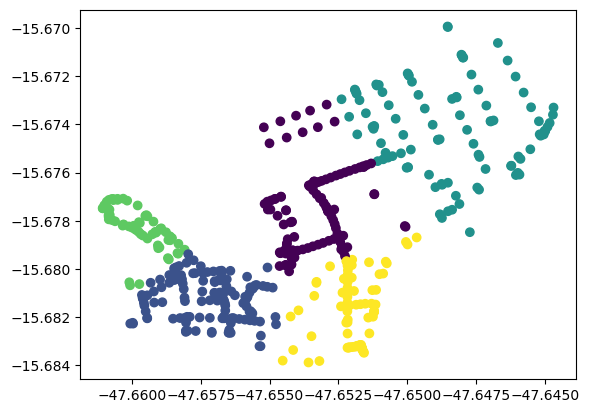

In [8]:
plt.scatter(df['Long'], df['lat'], c=df['y'])

In [9]:
model.inertia_

0.001968272296154824

In [10]:
df = df[:2000]
cluster1 = df[['lat', "Long"]][df['y'] == 0].values.tolist()
cluster2 = df[['lat', "Long"]][df['y'] == 1].values.tolist()
cluster3 = df[['lat', "Long"]][df['y'] == 2].values.tolist()
cluster4 = df[['lat', "Long"]][df['y'] == 3].values.tolist()
cluster5 = df[['lat', "Long"]][df['y'] == 4].values.tolist()

In [11]:
map = folium.Map(location=[-15.6757800644885, -47.64997635636372], zoom_start=16,tiles = "openstreetmap")


In [12]:
for i in cluster1:
    folium.CircleMarker(i, radius=2,color='blue',fill_color='lightblue').add_to(map)
    
for i in cluster2:
    folium.CircleMarker(i, radius=2,color='red',fill_color='lightred').add_to(map)
    
for i in cluster3:
    folium.CircleMarker(i, radius=2,color='green',fill_color='lightgreen').add_to(map)
        
for i in cluster4:
    folium.CircleMarker(i, radius=2,color='yellow',fill_color='lightyellow').add_to(map)
        
for i in cluster5:
    folium.CircleMarker(i, radius=2,color='brown',fill_color='lightbrown').add_to(map)

In [13]:
map